# ml lab1

In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 10)

### 1. read ex1 data

In [303]:
data1 = np.genfromtxt('data/ex1data1.txt', delimiter=',')
rest = pd.DataFrame(data1, columns=['Population', 'Income'])
rest

,Population,Income
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


### 2. plot data

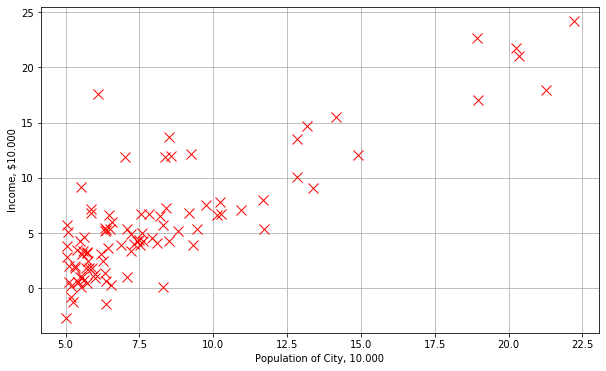

In [295]:
def get_plot():
    plt.figure(figsize=(10, 6))
    plt.grid(True)
    plt.ylabel('Income, $10.000')
    plt.xlabel('Population of City, 10.000')
    plt.plot(rest['Population'], rest['Income'], 'rx', markersize=10, label='Training Data')
    return plt

plot = get_plot()
plot.show()

### 3. cost function J(θ)

In [381]:
# Linear hypothesis function
def h(X, theta): 
    return np.dot(X, theta)

# J = compute_cost(X, y, theta)
# computes the cost of using theta as the parameter for linear regression to fit the data points in X and y
def compute_cost(X, y, theta):
    m = y.size
    loss = h(X, theta) - y
    return np.sum(np.square(loss)) / (2. * m)

In [420]:
(_, n) = rest.shape
theta = np.zeros((1, n)).T

X1 = rest[['Population']]
X1.insert(0, 'theta_0', 1)
y1 = rest[['Income']]

J = compute_cost(X1, y1, theta)
print(f'theta:\t{theta.ravel()}\nJ:\t{float(J)}')

theta:	[0. 0.]
J:	32.072733877455676


### 4. gradient descent

In [421]:
# Performs gradient descent to learn theta
def gradient_descent(X, y, theta, alpha=0.01, iterations=1500):
    m = y.size
    J_history = []
    XT = X.T

    for i in range(iterations):
        loss = h(X, theta) - y
        gradient = np.dot(XT, loss) / m
        theta -= alpha * gradient
        J_history.append(compute_cost(X, y, theta))
    return theta, J_history

theta, j_history = gradient_descent(X1, y1, theta)
print(f'computed theta: {theta.ravel()}')

computed theta: [-3.63029144  1.16636235]


In [387]:
sample_population = [3, 11, 15, 16, 18.5]
predicted_income = [np.dot([1, x], theta).sum() for x in sample_population]
pd.DataFrame(zip(sample_population, predicted_income), columns=['Sample Population', 'Predicted Income'])

,Sample Population,Predicted Income
0,3.0,-0.316625
1,11.0,9.227581
2,15.0,13.999684
3,16.0,15.192709
4,18.5,18.175274


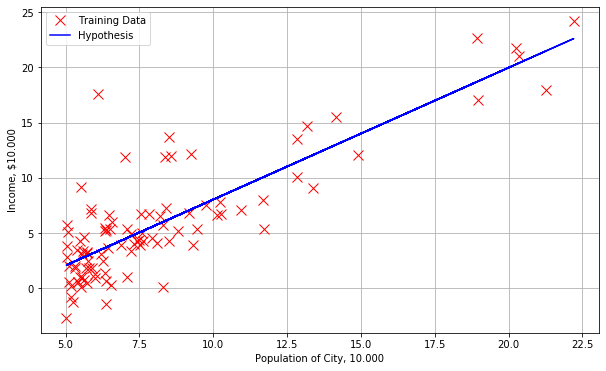

In [388]:
h_values = [np.dot(x, theta).sum() for x in X1.to_numpy()]

plot = get_plot()
plot.plot(rest['Population'], h_values, 'b-', label='Hypothesis')
plot.legend()
plot.show()

###  5. visualizing J(θ)

In [330]:
# grid coordinates for plotting
xvals = np.linspace(-10, 10, 50)
yvals = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(xvals, yvals, indexing='xy')
Z = np.zeros((xvals.size, yvals.size))

# calculate Z-values (Cost) based on grid of coefficients
for (i, j), v in np.ndenumerate(Z):
    Z[i, j] = compute_cost(X1, y1, theta=[[xx[i, j]], [yy[i, j]]])

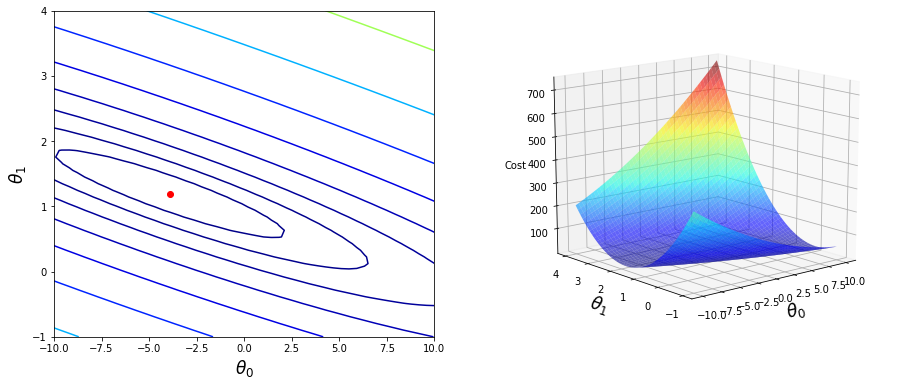

In [331]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

# left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(*theta, c='r')

# right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(), Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

### 6. read ex2 data

In [364]:
data2 = np.genfromtxt('data/ex1data2.txt', delimiter=',')
houses = pd.DataFrame(data2, columns=['Area', 'Bedrooms', 'Price'])
houses

,Area,Bedrooms,Price
0,2104.0,3.0,399900.0
1,1600.0,3.0,329900.0
2,2400.0,3.0,369000.0
3,1416.0,2.0,232000.0
4,3000.0,4.0,539900.0
...,...,...,...
42,2567.0,4.0,314000.0
43,1200.0,3.0,299000.0
44,852.0,2.0,179900.0
45,1852.0,4.0,299900.0


### 7. features normalization

In [487]:
# Normalizes the features in X:
#   returns a normalized version of X where
#   the mean value of each feature is 0 and the standard deviation is 1
def feature_normalization(X):
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    return (X - mu) / sigma, mu, sigma

In [488]:
X2 = houses[['Area', 'Bedrooms']]
X2_norm, mu, sigma = feature_normalization(X2)
X2_norm.describe()

,Area,Bedrooms
count,4.700000e+01,4.700000e+01
mean,3.779483e-17,2.185013e-16
std,1.000000e+00,1.000000e+00
min,-1.445423e+00,-2.851859e+00
25%,-7.155897e-01,-2.236752e-01
50%,-1.417900e-01,-2.236752e-01
75%,3.376348e-01,1.090417e+00
max,3.117292e+00,2.404508e+00


In [489]:
y2 = houses[['Price']]
_, n2 = houses.shape

X2.insert(0, 'theta_0', 1)
X2_norm.insert(0, 'theta_0', 1)

In [490]:
t1 = np.zeros((1, n2)).T
t2 = np.zeros((1, n2)).T
(theta1, j_history) = gradient_descent(X2, y2, t1, 0.00000001, 50)
(theta2, j_norm_history) = gradient_descent(X2_norm, y2, t2, 0.1, 50)
print(f'theta1:\t{theta1.ravel()}\ntheta2:\t{theta2.ravel()}')

theta1:	[6.96485826e-02 1.49853133e+02 2.24735775e-01]
theta2:	[ 3.38658249e+05  1.04127516e+05 -1.72205334e+02]


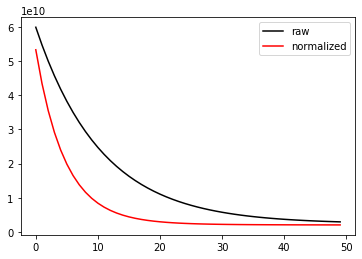

In [435]:
p1 = plt.plot(range(len(j_history)), j_history, color='black')
p2 = plt.plot(range(len(j_norm_history)), j_norm_history, color='red')
plt.legend((p1[0], p2[0]), ('raw', 'normalized'))
plt.show()

### 8. multi gradient descent with vectorizing

In [436]:
alpha = 0.01
iterations = 400


(theta_mul, _) = gradient_descent(X2_norm, y2, np.zeros((1, n2)).T, alpha, iterations)
print(f'theta_mul:\t{theta_mul.ravel()}')

theta_mul:	[334302.06399328 100087.11600585   3673.54845093]


### 9. execution time

In [437]:
from timeit import default_timer

iterations = 1000
alpha = 0.02

start = default_timer()
(theta_timer, _) = gradient_descent(X2_norm.to_numpy(), y2.to_numpy(), np.zeros((1, n2)).T, alpha, iterations)
end = default_timer()
print(f'theta_timer:\t{theta_timer.ravel()}\ttime:{end - start}')

theta_timer:	[340412.65900156 110620.78816241  -6639.21215439]	time:0.02559936400211882


### 10. ɑ varying plot

In [458]:
def draw_alphas(iterations):
    alphas = np.linspace(0.1, 0.001, num=7)
    plots = []
    for alpha in alphas:
        (theta, j_hist) = gradient_descent(X2_norm.to_numpy(), y2.to_numpy(), np.zeros((1, n2)).T, alpha, iterations)
        p = plt.plot(range(len(j_hist)), j_hist)
        plots.append(p[0])
    
    plt.title(f'iterations: {iterations}')
    plt.legend(plots, [f'Alpha: {a:.3f}' for a in alphas])
    plt.show()

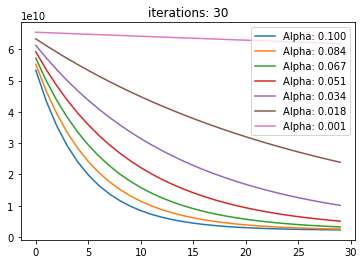

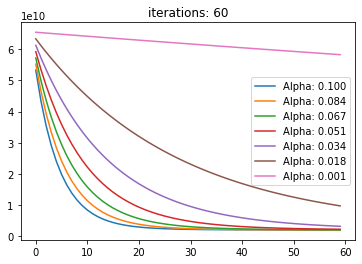

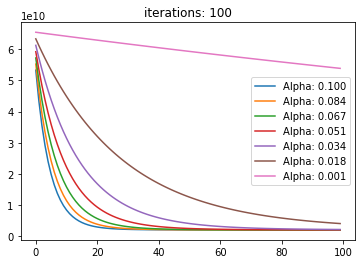

In [462]:
draw_alphas(30)
draw_alphas(60)
draw_alphas(100)

### 11. least squares

In [548]:
# computes the closed-form solution to linear regression using the normal equations
def normal_eqn(X, y):
    XX = np.asmatrix(X)
    XT = XX.T
    return np.array([float(el) for el in ((XT @ XX).I @ XT) @ y])

In [557]:
theta_sq = normal_eqn(X2.to_numpy(), y2.to_numpy())
print(f'theta_sq:\t{theta_sq.ravel()}\ntheta_gd:\t{theta_mul.ravel()}')

theta_sq:	[89597.9095428    139.21067402 -8738.01911233]
theta_gd:	[334302.06399328 100087.11600585   3673.54845093]


In [560]:
AREA = 1890
ROOMS = 4

price_sq = np.array([1, AREA, ROOMS]) @ theta_sq.T
price_gd = (np.array([1, (AREA - mu[0]) / sigma[0], (ROOMS - mu[1]) / sigma[1]]) @ theta_mul)[0]
print(f'price_sq:\t{price_sq}\nprice_gd:\t{price_gd}')

price_sq:	317754.00698679825
price_gd:	324368.29504053446


### 12. conclusion

В лабараторной работе были рассмотрены случаи линейной и многомерной регресии с помощью методов **градиентного спуска** [#4] а также аналититеского метода **наименьших квадратов** [#11].

В работе использовался язык программирования **Python**, интерактиваня среда разработки **Jupyter** а также библиотеки `numpy`, `pandas` и `matplotlib`

- Как видно из графика [#7] нормализация увеличивает скорость сходимости градиентного спуска.
- В пункте #10 показана зависимость скорости сходимости от параметра ɑ и количества итераций.
- В пункте #11 метод градиентного спуска сравнивается с методом наименьших квадратов.